In [51]:
#### Imports

In [52]:
import numpy as np
import pandas as pd

In [53]:
import tensorflow as tf
# from tensorflow

In [54]:
### Load Data

In [55]:
df = pd.read_parquet('/content/drive/MyDrive/Amazon Reviews/AMAZON_FASHION_v3.parquet')[['overall', 'reviewText']]

In [56]:
df.shape

(823065, 2)

In [57]:
df.head().T

,0,1,2,3,4
overall,5,2,2,5,4
reviewText,Exactly what I needed.,"I agree with the other review, the opening is ...",too tiny an opening,Exactly what I wanted.,These little plastic backs work great. No mor...


Pre-process Labels

In [58]:
df.loc[:,'sentiment'] = 0
df.loc[df['overall'] < 3,'sentiment'] = 1

In [59]:
df.head()

,overall,reviewText,sentiment
0,5,Exactly what I needed.,0
1,2,"I agree with the other review, the opening is ...",1
2,2,too tiny an opening,1
3,5,Exactly what I wanted.,0
4,4,These little plastic backs work great. No mor...,0


In [60]:
df.drop(columns=['overall',], inplace=True)

# Split Data

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
df.sentiment.value_counts()

0    662352
1    160713
Name: sentiment, dtype: int64

In [63]:
## Spliting
data = pd.concat([df[df.sentiment == 0].head(50000), df[df.sentiment == 1].head(50000)], ignore_index=True)

In [64]:
del df

In [65]:
X = data.reviewText.apply(lambda review: review.lower())
y = data.sentiment

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [67]:
X_train

98980                                 i returned the item.
69824    the color on the web site is not what you'll g...
9928                                            feel great
75599    beads are strung on a cheap thread. the metal ...
95621    this top was not slim and the sleeves were way...
                               ...                        
6265     in true carhart fashion you never know what yo...
54886    these do not warm my ears.  they are barely be...
76820    they are poorly put together about 3 in batch ...
860      i bought these for a halloween costume and for...
15795    absolutely love this hat.  the brim is nice an...
Name: reviewText, Length: 75000, dtype: object

In [68]:
y_train

98980    1
69824    1
9928     0
75599    1
95621    1
        ..
6265     0
54886    1
76820    1
860      0
15795    0
Name: sentiment, Length: 75000, dtype: int64

In [69]:
# Encode Labels
y_train = tf.one_hot(y_train, depth=2)
y_test = tf.one_hot(y_test, depth=2)

NLP

In [70]:
VOCAB_SIZE = 1000
BATCH_SIZE = 64

In [71]:
# init Tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=VOCAB_SIZE, oov_token='')

# fit on train
tokenizer.fit_on_texts(X_train)

# generate sequence
train_tokens = tokenizer.texts_to_sequences(X_train)
train_padded_tokens = tf.keras.preprocessing.sequence.pad_sequences(train_tokens, maxlen=100, padding='post', truncating='post')
train_padded_tokens[:2]

array([[  3, 265,   2, 160,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2, 120,  18,   2,   1,   1,   8,  13,  59,   1,  56,  20, 629,
        134,   2,   1,   1,  13,   6,   1,  58,  44,   6, 689,   1,  58,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [72]:
# generate sequence
test_tokens = tokenizer.texts_to_sequences(X_test)
test_padded_tokens = tf.keras.preprocessing.sequence.pad_sequences(test_tokens, maxlen=100, padding='post', truncating='post')
test_padded_tokens[:2]

array([[172,   8,  20, 182,   9,   6,   1,  63,   1, 382,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 21,  55, 344,  17,   1, 133,  79,  10, 146, 162,   1, 811,  80,
          1,   7,  56,  24,  18,  17,  19,  76, 167,   7,  28,  10, 665,
        811,   4, 270, 727,   9,   6, 692, 756,  70,   1, 136,   2,   1,
          7, 653,   7, 378, 168,  24,  18,  17,   1, 507,   6, 240,   3,
         39, 137,  10, 817,  18,  10, 200,   4, 911,  21,  14,   2,   1,
        265,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

**Modeling**

In [73]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras import Sequential, callbacks

In [74]:
lstm_model = Sequential(
    [
        Embedding(input_dim=VOCAB_SIZE, output_dim=128),
        Bidirectional(
            LSTM(64, return_sequences=True)
        ),
        Bidirectional(
            LSTM(128)
        ),
        Dense(128, activation='relu'),
        Dropout(rate=0.5),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(64, activation='relu'),
        Dense(2, activation='softmax')
    ]
)

In [75]:
# EarlyStopping
es = callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3)

In [76]:
with tf.device('/GPU:0'):
    # Compile Model
    lstm_model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy',]
    )

    # Train and Validate
    lstm_model.fit(
        train_padded_tokens, y_train,
        epochs=25, steps_per_epoch=250,
        validation_data=(test_padded_tokens, y_test),
        validation_steps=50, callbacks=[es]
    )


Epoch 1/25
250/250 [==============================] - 25s 70ms/step - loss: 0.3145 - accuracy: 0.8622 - val_loss: 0.2351 - val_accuracy: 0.9050
Epoch 2/25
250/250 [==============================] - 11s 46ms/step - loss: 0.2368 - accuracy: 0.9061 - val_loss: 0.2282 - val_accuracy: 0.9059
Epoch 3/25
250/250 [==============================] - 11s 44ms/step - loss: 0.2207 - accuracy: 0.9110 - val_loss: 0.2226 - val_accuracy: 0.9112
Epoch 4/25
250/250 [==============================] - 11s 44ms/step - loss: 0.2066 - accuracy: 0.9172 - val_loss: 0.2229 - val_accuracy: 0.9119
Epoch 5/25
250/250 [==============================] - 11s 44ms/step - loss: 0.1939 - accuracy: 0.9232 - val_loss: 0.2131 - val_accuracy: 0.9154
Epoch 6/25
250/250 [==============================] - 11s 45ms/step - loss: 0.1846 - accuracy: 0.9273 - val_loss: 0.2088 - val_accuracy: 0.9168
Epoch 7/25
250/250 [==============================] - 11s 45ms/step - loss: 0.1728 - accuracy: 0.9318 - val_loss: 0.2044 - val_accuracy:

In [83]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         128000    
                                                                 
 bidirectional_4 (Bidirecti  (None, None, 128)         98816     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 256)               263168    
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 128)              

**Analysis**

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [85]:
metrics = pd.DataFrame(lstm_model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.314517,0.862173,0.235121,0.90496
1,0.236775,0.906133,0.228241,0.90592
2,0.220746,0.910987,0.222553,0.91120
3,0.206623,0.917227,0.222864,0.91192
4,0.193867,0.923173,0.213073,0.91544
5,0.184570,0.927333,0.208775,0.91680
6,0.172757,0.931827,0.204440,0.92000
7,0.163527,0.937040,0.211368,0.91732
8,0.153551,0.940920,0.205417,0.91952
9,0.144951,0.944240,0.212968,0.92224


In [86]:
metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
loss,18.0,0.161177,0.057722,0.091629,0.116240,0.149251,0.191543,0.314517
accuracy,18.0,0.936470,0.025894,0.862173,0.924213,0.942580,0.956180,0.965213
val_loss,18.0,0.221996,0.013026,0.204440,0.211768,0.222650,0.230433,0.256179
val_accuracy,18.0,0.917267,0.005396,0.904960,0.915780,0.919520,0.920330,0.923200


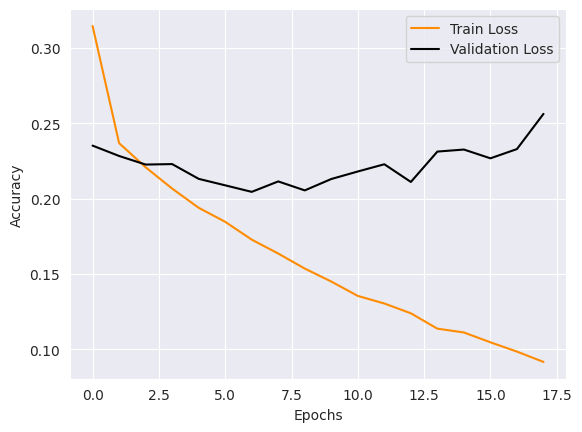

In [81]:
sns.set_style(style='darkgrid')
plt.plot(metrics.index, metrics.loss, color='darkorange', label='Train Loss')
plt.plot(metrics.index, metrics.val_loss, color='black', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

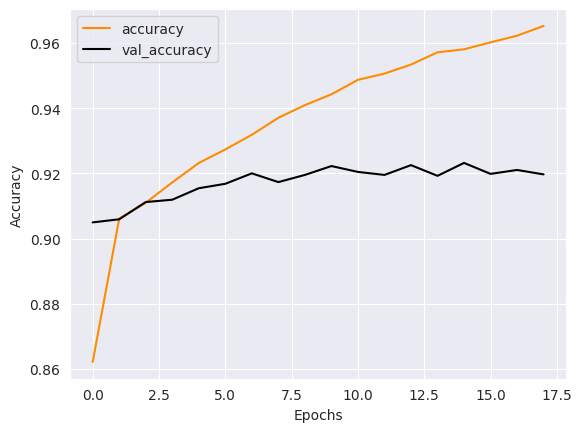

In [82]:
sns.set_style(style='darkgrid')
plt.plot(metrics.index, metrics.accuracy, color='darkorange', label='accuracy')
plt.plot(metrics.index, metrics.val_accuracy, color='black', label='val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()